<h1><center><font color='blue'>Assignment 3</font></center></h1>
<h3><center><font color='red'>PCA vs Sparse Random Projections on Breast Cancer DataBase (Based on Prof. Dr Jan Nagler's code)</font></center></h3>

### <font color='Green'>For this Assignment i will use Breast Cancer Dataset, with SVM (RBF Kernal) and same parameter grid used in Assignment 2</font>

In [ ]:
from sklearn.metrics import f1_score
y = cancer.target
df.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=330)

### Getting Baseline score Without PCA or Sparse Random Projections using F1_Score

In [ ]:
svm_clf = svm.SVC(class_weight='balanced')
CV_svm_rbf = parameter_grid(param_grid_rbf, scorers, X_train, y_train, cv=None, refit='f1_score', model=svm_clf)
results =pd.DataFrame(data = rbf_results['mean_test_f1_score'])
svm_clf = svm_clf.set_params(**CV_svm_rbf.best_params_)
svm_clf.fit(X_train, y_train)
Y_test_pred = svm_clf.predict(X_test)
f1_score_Baseline = f1_score(y_test, Y_test_pred)

In [ ]:
print("Baseline F1 Score on Test Data: %.3f" % f1_score_Baseline)

Baseline F1 Score on Test Data: 0.969


In [ ]:
dims = np.int32(np.linspace(2, 20, 19))

## SRPs with Varing Dimentions 

In [ ]:
from sklearn.metrics import f1_score
F1_Score_SRP = []

In [ ]:
#SRP
# Loop over the projection sizes, k
for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    newdata = sp.fit_transform(X_train)
    srp_Df = pd.DataFrame(data = newdata)
    
    svm_clf = svm.SVC(class_weight='balanced')
    CV_svm_rbf = parameter_grid(param_grid_rbf, scorers, srp_Df, y_train, cv=None, refit='f1_score', model=svm_clf)
    results =pd.DataFrame(data = rbf_results['mean_test_f1_score'])
    svm_clf = svm_clf.set_params(**CV_svm_rbf.best_params_)
    
    svm_clf.fit(srp_Df, y_train)
    X_test_sp = sp.transform(X_test)
    Y_test_pred = svm_clf.predict(X_test_sp)
    F1_Score_SRP.append(f1_score(y_test, Y_test_pred))

In [ ]:
#F1_Score_SRP

## PCA with Varing Dimentions 

In [ ]:
from sklearn.metrics import f1_score
F1_Score_PCA = []

In [ ]:
#PCA
# Loop over the projection sizes, k
for dim in dims:
    # Create random projection
    pca = PCA(n_components = dim)
    newdata = pca.fit_transform(X_train)
    principalDf = pd.DataFrame(data = newdata)
    
    svm_clf = svm.SVC(class_weight='balanced')
    CV_svm_rbf = parameter_grid(param_grid_rbf,scorers, principalDf, y_train, cv=None, refit='f1_score', model=svm_clf)
    results =pd.DataFrame(data = rbf_results['mean_test_f1_score'])
    svm_clf = svm_clf.set_params(**CV_svm_rbf.best_params_)
    

    svm_clf.fit(principalDf, y_train)
    X_test_pca = pca.transform(X_test)
    Y_test_pred = svm_clf.predict(X_test_pca)
    F1_Score_PCA.append(f1_score(y_test, Y_test_pred))

In [ ]:
#F1_Score_PCA

### Plot F1_scores returned by PCA and SRPs wrt. Dimentions in one graph. 

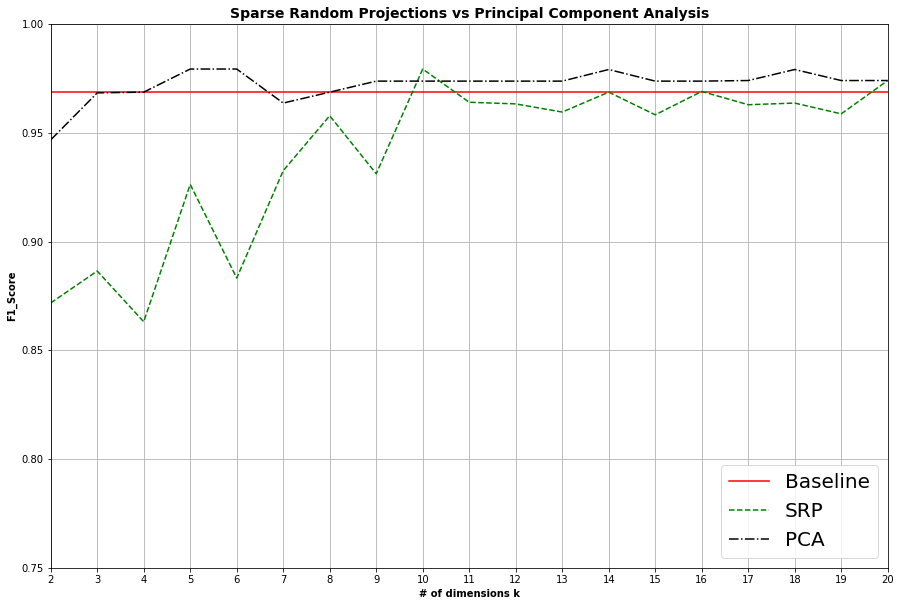

In [ ]:
# Create figure
plt.figure(figsize=(15,10))
plt.xlabel("# of dimensions k",fontweight='bold')
plt.ylabel("F1_Score",fontweight='bold')
 
# Plot baseline, random projection and PCA 
plt.plot(dims, [f1_score_Baseline] * len(F1_Score_SRP), color = "r", label='Baseline')
plt.plot(dims, F1_Score_SRP, color = "g", label='SRP', linestyle='--')
plt.plot(dims, F1_Score_PCA, color = "black", label='PCA', linestyle='-.')
plt.title('Sparse Random Projections vs Principal Component Analysis',fontsize=14, fontweight='bold')
plt.xlim(2, 20)
plt.ylim(0.75, 1)
plt.xticks(dims)
plt.legend(loc=4, prop={'size': 20})
plt.grid()
plt.show()


### For Breast Cancer Dataset, it is clear that PCA wins.  PCA has significantly improved the F1_Scores and touches baseline at 3 dimenstions(Optimal number of dimentions would be 5). SRPs managed to cross the Baseline with 10 dimentions.